In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
from collections import defaultdict
import ipdb

### 1) CoupledLogarithm

In [2]:
def coupled_logarithm(value: [int, float, np.ndarray], kappa: [int, float] = 0.0, dim: int = 1) -> [float, np.ndarray]:
    """
    Generalization of the logarithm function, which defines smooth
    transition to power functions.
    
    Parameters
    ----------
    value : Input variable in which the coupled logarithm is applied to.
            Accepts int, float, and np.ndarray data types.
    kappa : Coupling parameter which modifies the coupled logarithm function.
            Accepts int and float data types.
    dim : The dimension (or rank) of value. If value is scalar, then dim = 1.
          Accepts only int data type.
    """
    # convert value into np.ndarray (if scalar) to keep consistency
    value = np.array(value) if isinstance(value, (int, float)) else value
    assert isinstance(value, np.ndarray), "value must be an int, float, or np.ndarray."
    assert 0. not in value, "value must not be or contain any zero(s)."
    if kappa == 0.:
        coupled_log_value = np.log(value)  # divide by 0 if x == 0
    else:
        coupled_log_value = (1. / kappa) * (value**(kappa / (1. + dim*kappa)) - 1.)
    return coupled_log_value


#### Test with scalar --> np.array

In [3]:
X = 3.69369395
kappa = 0.

In [4]:
coupled_logarithm(X, kappa)

1.3066270277762608

#### Test with np.array

In [5]:
# 1000 linearly spaced numbers, starting from ALMOST 0
X = np.linspace(1e-6, 5, 1000)
y = {}

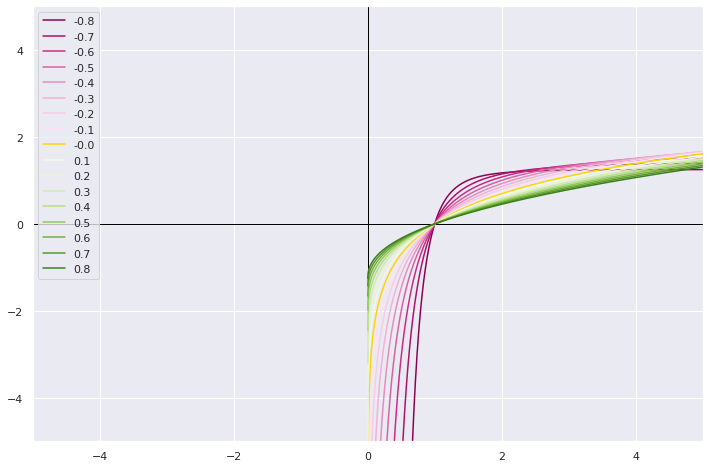

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

for kappa in kappa_values:
    y[kappa] = coupled_logarithm(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

### 2) CoupledExponential

In [65]:
def coupled_exponential(value: [int, float, np.ndarray], kappa: float = 0.0, dim: int = 1) -> [float, np.ndarray]:
    """
    Generalization of the exponential function.
    
    Parameters
    ----------
    value : [float, Any]
        Input values in which the coupled exponential is applied to.
    kappa : float,
        Coupling parameter which modifies the coupled exponential function. 
        The default is 0.0.
    dim : int, optional
        The dimension of x, or rank if x is a tensor. The default is 1.
    
    Returns
    -------
    float
        The coupled exponential values.
    
    """
    # convert number into np.ndarray to keep consistency
    value = np.array(value) if isinstance(value, (int, float)) else value
    assert isinstance(value, np.ndarray), "value must be an int, float, or np.ndarray."
    assert 0 not in value, "value must not be or contain any zero(s)."
    assert isinstance(dim, int) and dim >= 0, "dim must be an integer greater than or equal to 0."
    # check that -1/d <= kappa
    assert -1/dim <= kappa, "kappa must be greater than or equal to -1/dim."

    if kappa == 0:
        coupled_exp_value = np.exp(value)
    elif kappa > 0:
        # coupled_exp_value = (1 + kappa*value)**((1 + dim*kappa)/kappa)
        coupled_exp_value = (1 + kappa*value)**(1 / (kappa / (1 + dim*kappa)))
    # the following is given that kappa < 0
    else:
        def _compact_support(value, kappa, dim):
            if (1 + kappa*value) >= 0:
                try:
                    # return (1 + kappa*value)**((1 + dim*kappa)/kappa)
                    return (1 + kappa*value)**(1 / (kappa / (1 + dim*kappa)))
                except ZeroDivisionError:
                    print(f"Skipped ZeroDivisionError at the following: value = {value}, kappa = {kappa}. Therefore, (1+kappa*value) = {(1+kappa*value)}")
            elif ((1 + dim*kappa)/kappa) > 0:
                return 0.
            else:
                return float('inf')    
        compact_support = np.vectorize(_compact_support)
        coupled_exp_value = compact_support(value, kappa, dim)
    '''
    elif (1 + kappa*value) >= 0:
        coupled_exp_value = (1 + kappa*value)**(1/(kappa / (1 + dim*kappa))) # removed negative sign and added reciprocal
    elif (kappa / (1 + dim*kappa)) > 0: # removed negative sign
        coupled_exp_value = 0
    else:
        coupled_exp_value = float('inf')
    '''
    return coupled_exp_value

#### Test with scalar --> np.array

In [66]:
X = 3.69369395
kappa = 0.5

In [67]:
coupled_exponential(X, kappa)

23.072378632361357

#### Test with np.array

In [80]:
# 100 linearly spaced numbers, starting from CLOSE to 0
X = np.linspace(-5, 5, 1000)
y = {}

Skipped ZeroDivisionError at the following: value = 5.0, kappa = -0.2. Therefore, (1+kappa*value) = 0.0


/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power


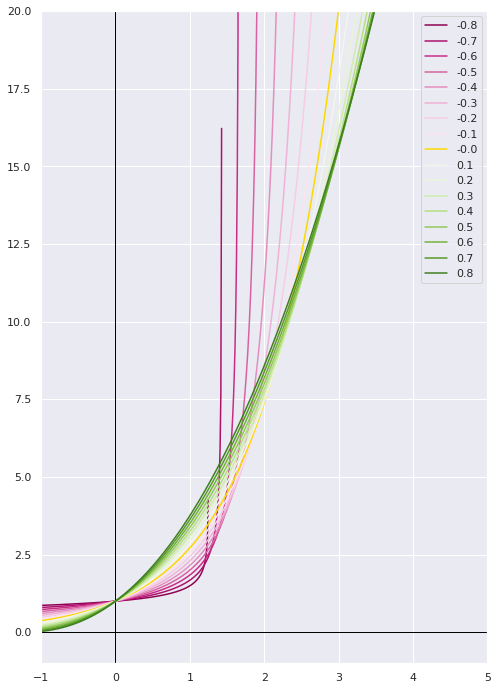

In [81]:
fig, ax = plt.subplots(figsize=(8, 12))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-1, 5)
plt.ylim(-1, 20)

for kappa in kappa_values:
    y[kappa] = coupled_exponential(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();